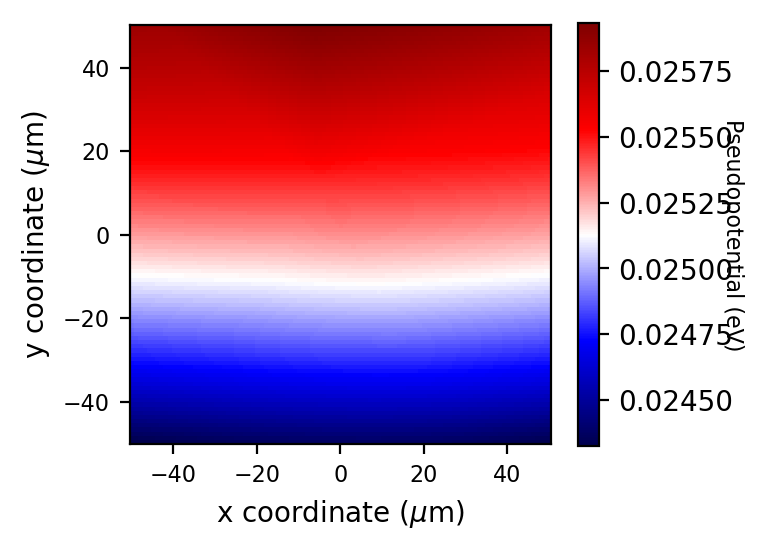

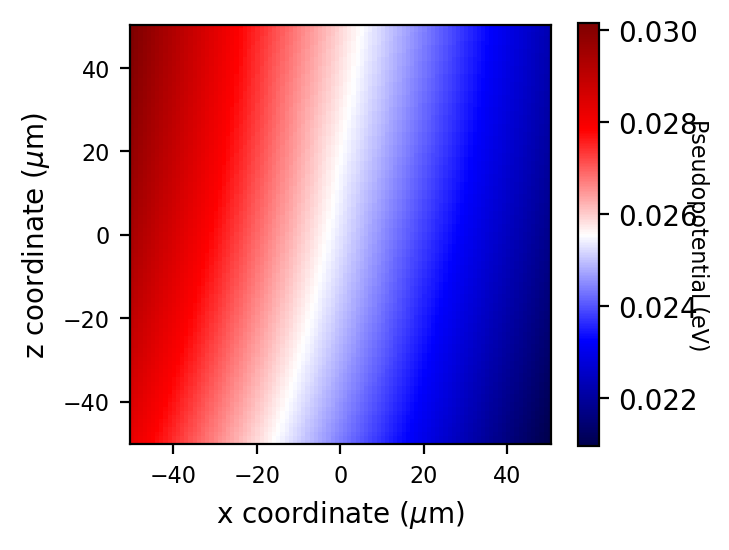

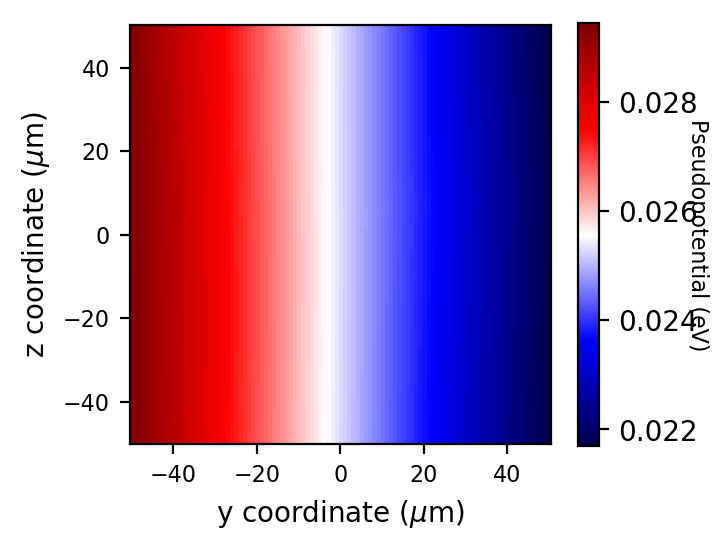

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas
import time
from matplotlib import cm,ticker


file_location = r'C:\Users\cm467\Documents\Ansoft'
file_name = 'DC_bl3_100um_cubed_1mu_steps.fld'
full = file_location + '/' + file_name

df = pandas.read_csv(full, sep=' ', skiprows = 2, header = None)

# # if includes grid, use following
# df = df.iloc[:, [0,1,2,4]]
# # print (df.head(5))
# # print (df.tail(5))
# df.columns = ['X', 'Y','Z','V']
# print (df.head(5))
# print (df.tail(5))
# X = df.iloc[:,0].values
# Y = df.iloc[:,1].values
# Z = df.iloc[:,2].values
# V = df.iloc[:,3].values
# print (np.amin(np.abs(X)))

# if doesn't include grid, use this:
df.columns = ['V']
# print (df.head(5))
# print (df.tail(5))
V = df.iloc[:,0].values
x = np.arange(-50,51,1)
y = np.arange(-50,51,1)
z = np.arange(-50,51,1)
Z = np.tile(z,len(x)*len(y))
# print (Z)
Y = np.tile(y,(len(x),len(z)))
Y = np.ndarray.flatten(Y.T)
# print (Y)
X = np.tile(x,(len(y)*len(z),1))
X = np.ndarray.flatten(X.T)
# print (X)
df['X'] = X
df['Y'] = Y
df['Z'] = Z


# select cuts in the XY, XZ, YZ planes

# take all df entries where Z = 0
XY_matrix = df[df.Z == 0.0].loc[:, 'V'].values
V_XY = np.reshape(XY_matrix,(101,101))
# take all df entries where Y = 0
XZ_matrix = df[df.Y == 0.0].loc[:, 'V'].values
# print (XZ_matrix[99:110])
V_XZ = np.reshape(XZ_matrix,(101,101))
# take all df entries where X = 0
YZ_matrix = df[df.X == 0.0].loc[:, 'V'].values
# print (YZ_matrix[:10])
V_YZ = np.reshape(YZ_matrix,(101,101))

# XY plot
plt.figure(figsize = (3.4,2.8), dpi = 200)
# im = plt.imshow(V_XY, interpolation='nearest', extent=[-50.5,50.5,-50.25,50.25], cmap=cm.seismic, vmin=np.log(1.E-3), vmax=np.log(100), origin = 'lower')
im = plt.imshow(V_XY, interpolation='none', extent=[-50.5,50.5,-50.25,50.25], cmap=cm.seismic)
cm.seismic.set_bad(color='yellow')
cbar = plt.colorbar(im)#, ticks=[np.log(0.001), np.log(0.01), np.log(0.1), np.log(1), np.log(10)])
# cbar.ax.set_yticklabels(['0.001', '0.01', '0.1', '1', '10'], fontsize=8)  # vertically oriented colorbar
# cbar.ax.set_title('DC potential due to DC_tl1 (eV)', fontsize = 8)
cbar.set_label('Pseudopotential (eV)', fontsize = 8, rotation=270)
plt.xlabel('x coordinate ($\mu$m)', fontdict=None, labelpad=None)
plt.ylabel('y coordinate ($\mu$m)', fontdict=None, labelpad=None)
plt.tick_params(axis='both', which='major', labelsize=8)
# plt.savefig('Fusion_3D_100MHz_100V_oop_ps.png', bbox_inches = 'tight')
plt.show()

# XZ plot
plt.figure(figsize = (3.4,2.8), dpi = 200)
im = plt.imshow(V_XZ, interpolation='nearest', extent=[-50.5,50.5,-50.25,50.25], cmap=cm.seismic)
cm.seismic.set_bad(color='yellow')
cbar = plt.colorbar(im)#, ticks=[np.log(0.001), np.log(0.01), np.log(0.1), np.log(1), np.log(10)])
# cbar.ax.set_yticklabels(['0.001', '0.01', '0.1', '1', '10'], fontsize=8)  # vertically oriented colorbar
# cbar.ax.set_title('Pseudopotential (eV)', fontsize = 8)
cbar.set_label('Pseudopotential (eV)', fontsize = 8, rotation=270)
plt.xlabel('x coordinate ($\mu$m)', fontdict=None, labelpad=None)
plt.ylabel('z coordinate ($\mu$m)', fontdict=None, labelpad=None)
plt.tick_params(axis='both', which='major', labelsize=8)
# plt.savefig('Fusion_3D_100MHz_100V_oop_ps.png', bbox_inches = 'tight')
plt.show()

# YZ plot
plt.figure(figsize = (3.4,2.8), dpi = 200)
im = plt.imshow(V_YZ, interpolation='nearest', extent=[-50.5,50.5,-50.25,50.25], cmap=cm.seismic)
cm.seismic.set_bad(color='yellow')
cbar = plt.colorbar(im)#, ticks=[np.log(0.001), np.log(0.01), np.log(0.1), np.log(1), np.log(10)])
# cbar.ax.set_yticklabels(['0.001', '0.01', '0.1', '1', '10'], fontsize=8)  # vertically oriented colorbar
# cbar.ax.set_title('Pseudopotential (eV)', fontsize = 8)
cbar.set_label('Pseudopotential (eV)', fontsize = 8, rotation=270)
plt.xlabel('y coordinate ($\mu$m)', fontdict=None, labelpad=None)
plt.ylabel('z coordinate ($\mu$m)', fontdict=None, labelpad=None)
plt.tick_params(axis='both', which='major', labelsize=8)
# plt.savefig('Fusion_3D_100MHz_100V_oop_ps.png', bbox_inches = 'tight')
plt.show()

